In [1]:
# Tool
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

from sklearn.model_selection import train_test_split

%matplotlib inline

# gitbub
# https://github.com/amueller/introduction_to_ml_with_python

# 4章 データの表現と特徴量エンジニアリング

## 4.1 カテゴリ変数

### 4.1.1　ワンホットエンコーディング(ダミー変数)

In [13]:
# コラム名を含んだヘッダがないので、header=Noneを指定し、コラム名を'name'で明示的に指定
adult_path = './data/adult.data'
data = pd.read_csv(adult_path, header=None, index_col=False,
                  names=['age', 'workclass', 'fnlwgh', 'education', 'education-num',
                       'marital-status', 'occupation', 'relationship', 'race', 'gender',
                       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

# 解説の為にいくつかのカラムだけを選択
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
# Ipython.displayを使うとJupyter notebookできれいな出力が得られる
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [14]:
print(data['gender'].value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [15]:
print('Original features:\n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('Features after get_dummies:\n', list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [17]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Numpy配列を取り出す
X = features.values
y = data_dummies['income_ >50K'].values
print('X.shape: {} y.shape: {}'.format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [23]:
X

array([[39, 40,  0, ...,  0,  0,  0],
       [50, 13,  0, ...,  0,  0,  0],
       [38, 40,  0, ...,  0,  0,  0],
       ...,
       [58, 40,  0, ...,  0,  0,  0],
       [22, 20,  0, ...,  0,  0,  0],
       [52, 40,  0, ...,  0,  0,  0]], dtype=int64)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Test score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test score: 0.81


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.1.2 数値でエンコードされているカテゴリ

In [26]:
# 整数特徴量とカテゴリ文字列特徴量からなるDataFrameを作る
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                       'Categorical Feature':['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [27]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [29]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 4.2 ビニング、離散化、線形モデル、決定木

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

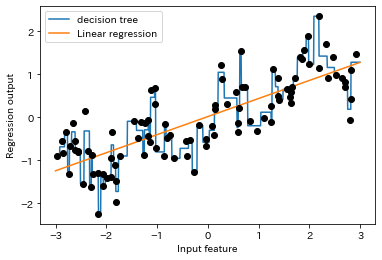

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='Linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [13]:
# 特徴量の入力レンジを10個のビンに分割する
bins = np.linspace(-3, 3, 11)
print('bins: {}'.format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [14]:
# 個々のデータポイントがどのピンに入るかを記録する
which_bin = np.digitize(X, bins=bins)
print('\nData points:\n', X[:5])
print('\nBin membership for data points:\n', which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [16]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoderで変換する
encoder = OneHotEncoder(sparse=False)
# encoder.fitでwhich_binに現れる整数値のバリエーションを確認
encoder.fit(which_bin)
# transformでワンホットエンコーディングを行う
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [17]:
print('X_binned.shape: {}'.format(X_binned.shape))

X_binned.shape: (100, 10)


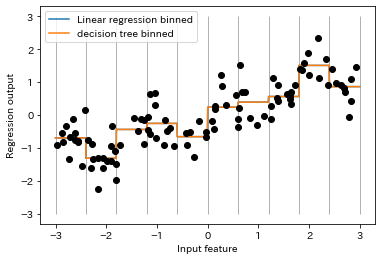

In [18]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.3)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

## 4.3 交互作用と多項式

In [20]:
# 線形モデルに傾きを加えるのにもとの特徴量を加える
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


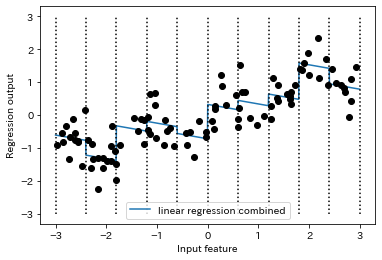

In [27]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c ='k')

In [29]:
# データポイントがどのピンに入っているかを示す特徴量とx軸のどこあるかを示す特徴量の交互作用もしくは積を特徴量として加える
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


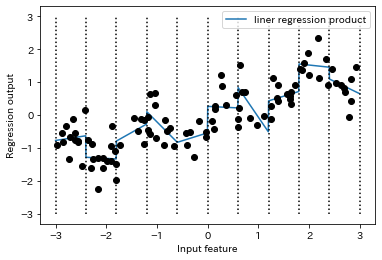

In [30]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line* line_binned])
plt.plot(line, reg.predict(line_product), label= 'liner regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c ='k')    

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# x **10までの多項式を加える
# デフォルトの'include_bias=True'だと、常にに1となる特徴量を加える
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [33]:
print('X_poly.shape:{}'.format(X_poly.shape))

X_poly.shape:(100, 10)


In [34]:
# X_polyの内容をＸと比較
print('Entries of X:\n{}'.format(X[:5]))
print('Entries of X_poly:\n{}'.format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [36]:
print('Polynomial feature name:\n{}'.format(poly.get_feature_names()))

Polynomial feature name:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


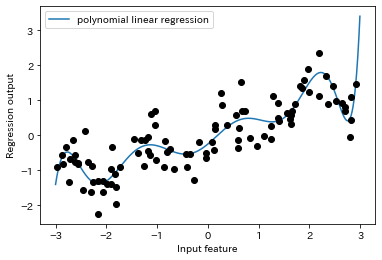

In [38]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

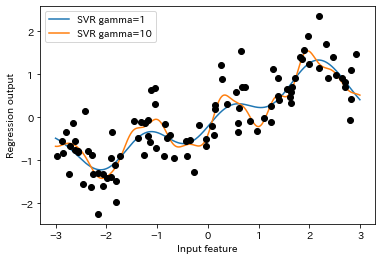

In [39]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')    

In [47]:
# boston_housingデータセットに交互作用特徴量と多項式特徴量に適用する
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# データのスケール変換
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# 2次までの多項式特徴量と交互作用を抽出しよう
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_poly.shape: {}'.format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [49]:
print('Polynomial feature names:\n{}'.format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [51]:
# Ridegeモデルをつかって交互作用特徴量を入れた場合と入れない場合を比較
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('Score without interactions: {:.3f}'.format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print('Score with interactions: {:.3f}'.format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


In [53]:
# ランダムフォレストモデルをつかって交互作用特徴量を入れた場合と入れない場合を比較 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print('Score without interactions: {:.3f}'.format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print('Score without interactions: {:.3f}'.format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.789
Score without interactions: 0.765


## 4.4 単変量非線形変換

In [54]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [55]:
print('Number of feature appearances:\n{}'.format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

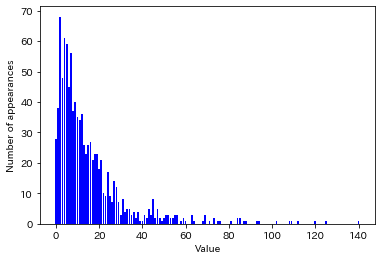

In [57]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel('Number of appearances')
plt.xlabel('Value')

In [59]:
# リッジ回帰でこのモデルを学習させる
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.622


In [60]:
# 対数変換を行う、ただしデータに0があるのでlog(X + 1)で計算する
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'value')

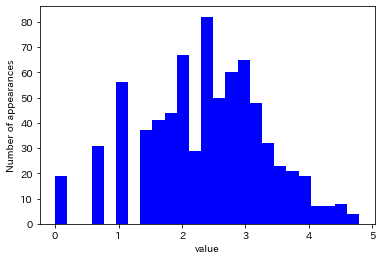

In [62]:
plt.hist(X_train_log[:, 0], bins=25, color='b')
plt.ylabel('Number of appearances')
plt.xlabel('value')

In [64]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.875


## 4.5 自動特徴量選択

### 4.5.1 単変量統計

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# シードを指定して乱数を決定
rag = np.random.RandomState(42)
noise = rag.normal(size=(len(cancer.data), 50))
# ノイズ特徴量をデータに加える
# 最初の30特徴量はデータセットから来たもの。続く50特徴量はノイズ
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(デフォルト)とSlelectionPercentileを使って50%の特徴量を選択
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 訓練セットを変換
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

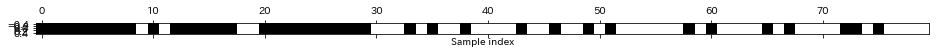

In [13]:
mask = select.get_support()
print(mask)
# マスクを可視化する　--黒が真、白が偽
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample index')

In [14]:
# ロジスティク回帰の性能を、すべての特徴量を使った場合と選択された場合で比較
from sklearn.linear_model import LogisticRegression

# テストデータの変換
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Score with all features: {:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('Score with only selected features: {:.3f}'.format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.5.2 モデルベース特徴量選択

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold='median')

In [16]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_l1.shape: {}'.format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

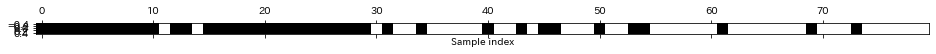

In [18]:
mask = select.get_support()
# マスクを可視化する　--黒が真、白が偽
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample index')

In [19]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.951


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.5.3 反復特徴量

Text(0.5, 0, 'Sample index')

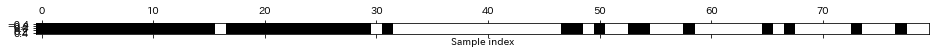

In [21]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# 選択された特徴量を可視化する
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [22]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.951


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# RFEの内部で用いられたモデルを用いて予測
print('Test score: {:.3f}'.format(select.score(X_test, y_test)))

Test score: 0.951


### 4.6 専門知識の利用

In [27]:
citibike = mglearn.datasets.load_citibike()

In [28]:
print('Citi Bike data:\n{}'.format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


C:\Users\mikam\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rentals')

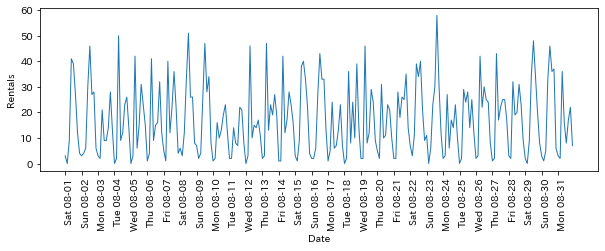

In [29]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rentals')

In [30]:
# ターゲット値(レンタル値)を抽出
y = citibike.values
# 10**9 で割ってPOSIX時刻に変換
X = citibike.index.astype('int64').to_numpy().reshape(-1, 1) // 10**9

In [32]:
# 最初の184データポイントを訓練に、残りをテストに使う
n_train = 184

# 与えられた特徴量セットで、回帰器を評価しプロットする関数
def eval_on_features(features, target, regressor):
    # 与えられた特徴量を訓練セットとテストセットに分割
    X_train, X_test = features[:n_train], features[n_train:]
    # ターゲットの配列も分割する
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('Test-set R^2: {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime('%a %m-%d'), rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='prediction test')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')    

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

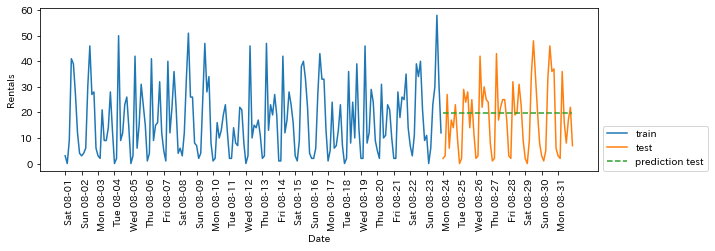

In [33]:
# POSIX時間を特徴量Xとし、ランダムフォレスト回帰器とともにeval_on_features関数を与える
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


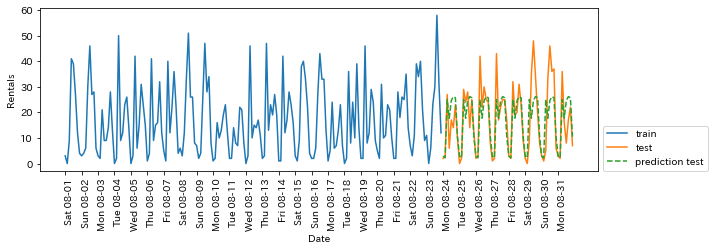

In [34]:
X_hour = citibike.index.hour.to_numpy().reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


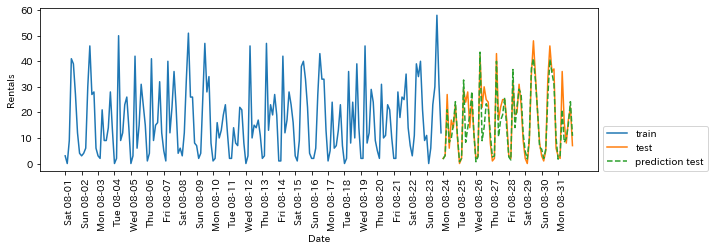

In [35]:
X_hour_week = np.hstack([citibike.index.dayofweek.to_numpy().reshape(-1, 1),
                         citibike.index.hour.to_numpy().reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13


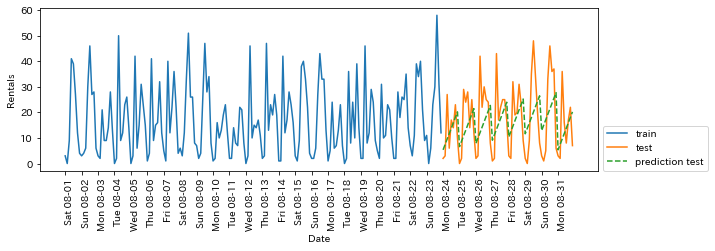

In [39]:
# LinerRegressionでテスト
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [42]:
# 整数をOneHotEncoderを用いて変換
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Test-set R^2: 0.62


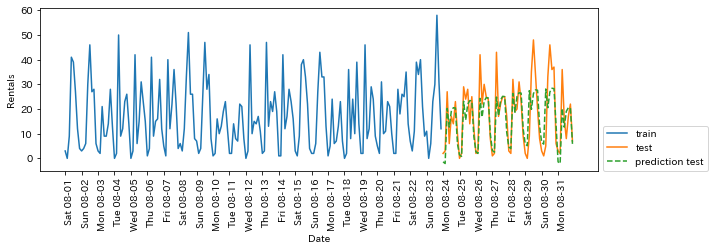

In [44]:
from sklearn.linear_model import Ridge
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


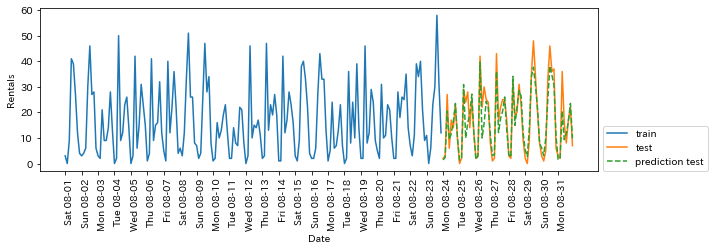

In [46]:
# 交互作用特徴量を用いて曜日と時刻の組み合わせに対して係数を学習させる
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [47]:
# モデルで学習した係数をプロットしてみる
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
features = day + hour

In [50]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

Text(0, 0.5, 'Feature magnitude')

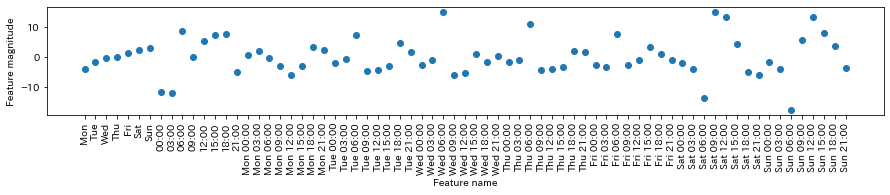

In [52]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('Feature name')
plt.ylabel('Feature magnitude')

# 5章　モデルの評価と改良

In [6]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 合成データセットの生成
X, y = make_blobs(random_state=0)
# dataトラベルを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# モデルのインスタンスを生成し、訓練データで学習
logreg = LogisticRegression().fit(X_train, y_train)
# テストセットでモデルを評価
print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test set score: 0.88


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 5.1 交差検証

#### 5.1.1 scilit-learnでの交差検証

In [7]:
# irisデータでLogisticRegressionを評価する
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris= load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

In [10]:
# パラメータcvで分割数を変更
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [11]:
# 交差検証の精度をまとめるには、一般に平均値を用いる
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.96


#### 5.1.3 層化K分割交差検証と他の戦略

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print('Iris labels:\n{}'.format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 5.1.3.1 交差検証のより詳細な制御

In [13]:
# 強制的にK分割交差検証を使う
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [14]:
print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [16]:
# 3分割の層化されていな交差検証をirisデータセットに使う
kfold = KFold(n_splits=3)
print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

#### 5.1.3.2 １つ抜き交差検証

In [18]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('Number of cv iterations:', len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

Number of cv iterations: 150
Mean accuracy: 0.95


#### 5.1.3.3 シャッフル分割交差検証

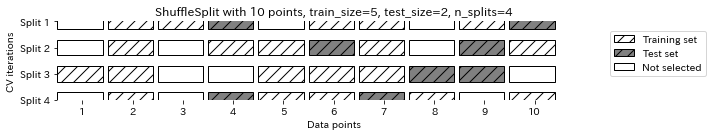

In [19]:
mglearn.plots.plot_shuffle_split()

In [21]:
from sklearn.model_selection import ShuffleSplit
shffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shffle_split)
print('Cross-validation scores:\n{}'.format(scores))

Cross-validation scores:
[0.96       0.96       0.90666667 0.92       0.92       0.97333333
 0.94666667 0.94666667 0.90666667 0.92      ]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

#### 5.1.3.4 グループ付き交差検証

In [24]:
from sklearn.model_selection import GroupKFold
# 合成データセットを生成
X, y = make_blobs(n_samples=12, random_state=0)
# 最初の3サンプルが同じグループに、次の4つが同じグループにする
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('Cross-validation scores:\n{}'.format(scores))

Cross-validation scores:
[0.75       0.8        0.66666667]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

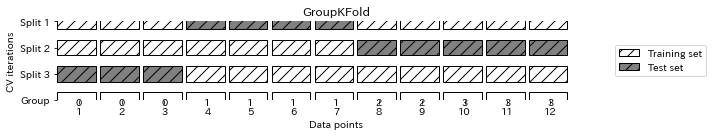

In [25]:
mglearn.plots.plot_group_kfold()

## 5.2 グリッドサーチ

#### 5.2.1 単純なグリッドサーチ

In [4]:
# ナイーブなグリッドサーチの実装
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('Size of training set: {} size of test set: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCをテストセットで評価
        score = svm.score(X_test, y_test)
        # 良いスコアだったらスコアとパラメータを保持
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'mgamma': gamma}

print('Best score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'mgamma': 0.001}


#### 5.2.2 パラメータの過剰適合の危険性と検証セット

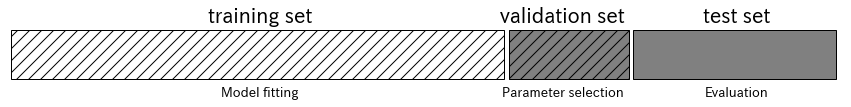

In [28]:
mglearn.plots.plot_threefold_split()

In [5]:
from sklearn.svm import SVC
# データを訓練+検証セットとテストセットに分割する
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# 訓練+検証セットを訓練セットと検証セットに分割する
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print('Size of training set: {}   size of validation set: {}   size of test set: {}\n'.format(
      X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCを検証セットで評価
        score = svm.score(X_valid, y_valid)
        # 良いスコアだったらスコアとパラメータを保持
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 訓練セットと検証セットを用いてモデルを再構築し、テストセットで評価
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameters: ', best_parameters)
print('Test set score with best parameters: {:.2f}'.format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 5.2.3 交差検証を用いたグリッドサーチ

In [9]:
# それぞれのパラメータの組み合わせに対して交差検証を行う

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練する
        svm = SVC(gamma=gamma, C=C)
        # 交差検証を行う
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 交差検証精度の平均値を計算する
        score = np.mean(scores)
        # 良いスコアが出たら、スコアとパラメータを記録する
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 訓練セットと検証セットを合わせて、モデルを再構築する
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)        

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


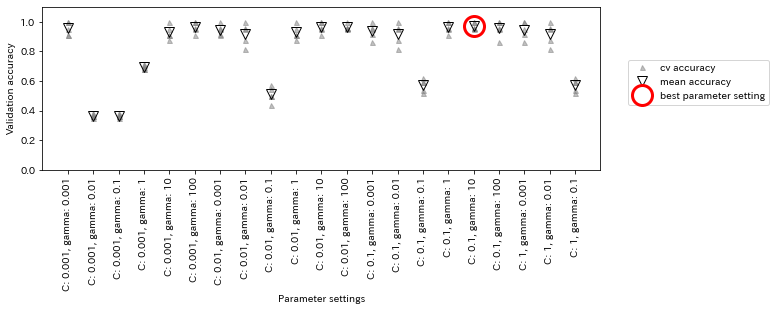

In [11]:
# 上記のコードで最良のパラメータ設定が選択された様子
mglearn.plots.plot_cross_val_selection()

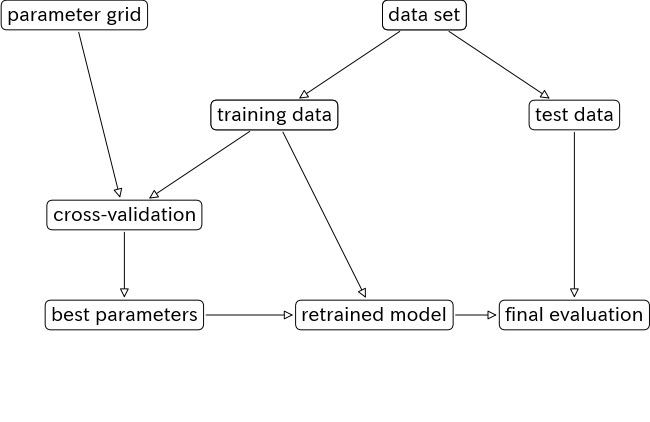

In [12]:
mglearn.plots.plot_grid_search_overview()

In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Parameter grid:\n{}'.format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [16]:
# インスタンスを作成
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [18]:
grid_search.fit(X_train, y_train)

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [21]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [22]:
print('Best estimator:\n{}'.format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### 5.2.3.1 交差検証の結果の解析

In [24]:
import pandas as pd
# DataFrameへ変換
results = pd.DataFrame(grid_search.cv_results_)
# 最初の5行を表示
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000800,0.000400,0.000202,0.000405,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
1,0.000401,0.000491,0.000596,0.000487,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
2,0.000999,0.000017,0.000200,0.000400,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
3,0.000800,0.000400,0.000000,0.000000,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
4,0.000600,0.000490,0.000200,0.000400,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22


In [26]:
scores = np.array(results.mean_test_score).reshape(6,6)

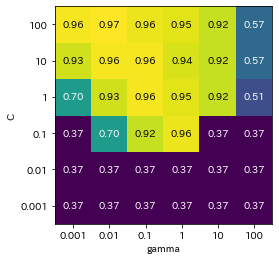

In [29]:
# 平均交差検証スコアのプロット
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


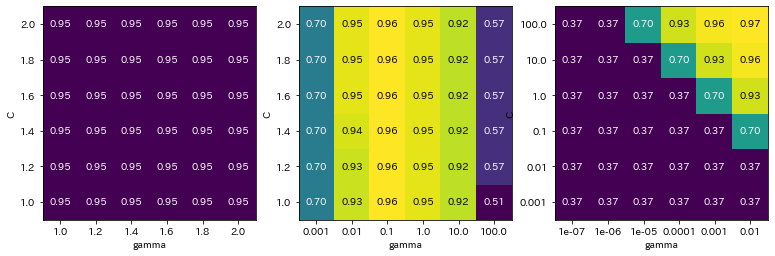

In [35]:
# サーチレンジが適切でないため、理想的でないプロットの例
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C' : np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
# 平均交差検証精度をプロット
    score_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                   yticklabels=param_grid['C'], cmap='viridis', ax=ax)

#### 5.2.3.2 グリッドでないサーチ空間 

In [36]:
param_grid = [{'kernel': ['rbf'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel': ['linear'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print('List of grids:\n{}'.format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [38]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation scores: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation scores: 0.97


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00079813,0.000399971,0.000803852,0.000800562,0.00100479,0.000599766,0,0.000200176,0.000999641,0.000800228,...,0.000199986,0.000399876,0.000599957,0.000599957,0,0.000399971,0.000199986,0.000199986,0.000399971,0.000400019
std_fit_time,0.00039907,0.000489862,0.000402091,0.00040056,1.95762e-05,0.000489708,0,0.000400352,1.67505e-06,0.000400117,...,0.000399971,0.000489746,0.000489863,0.000489862,0,0.000489862,0.000399971,0.000399971,0.000489862,0.000489921
mean_score_time,0.000400305,0.000199175,0.000201273,0.000199509,0,0.000200033,0,0,0,0.000199652,...,0.000200033,0,0,0.000400019,0.000800037,0.000199986,0.000199986,0.000199986,0.000200129,0.000199986
std_score_time,0.000490274,0.00039835,0.000402546,0.000399017,0,0.000400066,0,0,0,0.000399303,...,0.000400066,0,0,0.000489921,0.000400033,0.000399971,0.000399971,0.000399971,0.000400257,0.000399971
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


In [41]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),iris.data, iris.target, cv=5)
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 0.9666666666666668


In [42]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores=[]
    # 外側の交差検証による個々の分割に対するループ
    # (splitメソッドはインデッククスを返す)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 内側の交差検証を用いて最良のパラメータ設定を見つける
        best_score = -np.inf
        # 個々のパラメータ設定に対してループ
        for parameters in parameter_grid:
            # 内側の分割に対するスコアを格納
            cv_scores = []
            # 内側の交差検証のループ
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # 与えられたパラメータと訓練セットでクラス分類器を訓練
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 内側のテストセットを評価
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 内部の分割に対するスコアの平均を算出
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # これまでのものよりも良ければ、パラメータを記憶
                best_score = mean_score
                best_params = parameters
        # 最良のパラメータセットと外側の訓練セットを用いてクラス分類器を構築
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 評価する
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)
        

In [44]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                  StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


## 5.3 評価基準とスコア

#### 5.3.2.2 偏ったデータセット

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [5]:
# DummyClassifierを常に多数クラスを予測するようにして、精度が役にたたないようにする
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('Unique predicted labels: {}'.format(np.unique(pred_most_frequent)))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [6]:
# 実際のクラス分類器
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Test score: {:.2f}'.format(tree.score(X_test, y_test)))

Test score: 0.92


In [7]:
# LogisticRegressionとデフォルトのDummyClassfierで評価する
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy score: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg score: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy score: 0.83
logreg score: 0.98


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 5.3.2.3 混同行列

In [8]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


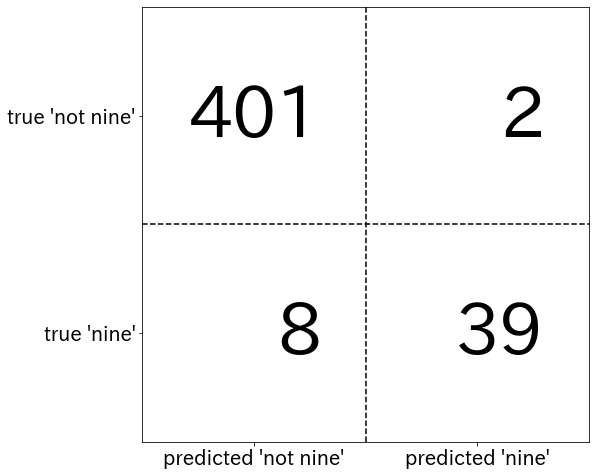

In [9]:
mglearn.plots.plot_confusion_matrix_illustration()

In [10]:
print('Most frequent class:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\nDummy model')
print(confusion_matrix(y_test, pred_dummy))
print('\nDecision tree')
print(confusion_matrix(y_test, pred_tree))
print('\nLogistic Regression')
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model
[[355  48]
 [ 39   8]]

Decision tree
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


In [12]:
from sklearn.metrics import f1_score
print('f1 score most frequent: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('f1 score dummy: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('f1 score tree: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('f1 score logistic regression: {:.2f}'.format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.16
f1 score tree: 0.55
f1 score logistic regression: 0.89


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,target_names=['not nine', 'nine'] ))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
 print(classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      0.88      0.89       403
        nine       0.14      0.17      0.16        47

    accuracy                           0.81       450
   macro avg       0.52      0.53      0.52       450
weighted avg       0.82      0.81      0.81       450



In [15]:
 print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



#### 5.3.2.4 不確実性を考慮に入れる

In [16]:
from sklearn.svm import SVC
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


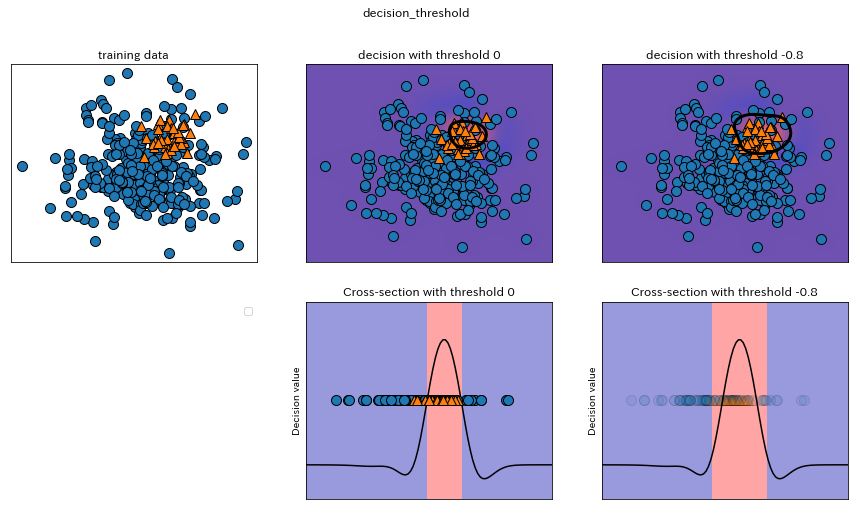

In [17]:
mglearn.plots.plot_decision_threshold()

In [18]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [19]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [20]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



#### 5.3.2.5 適合率_再現率カーブとROCカーブ

In [21]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


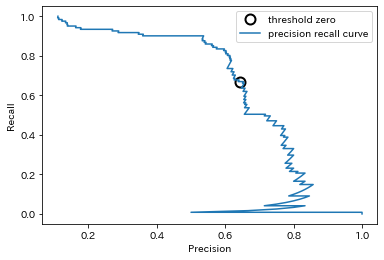

In [22]:
# カーブが滑らかになるようにデータポイントを増やす
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# ゼロに最も近いスレッショルドを探す
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label='threshold zero', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

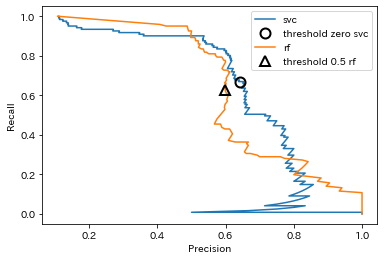

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifierにはpredict_probaはあるがdecision_functionがない
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label='threshold zero svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
        markersize=10, label='threshold 0.5 rf', fillstyle='none', mew=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

In [24]:
print('f1_score of random forest: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('f1_score of svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [25]:
# 平均適合率を計算
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('Average precision of random forest: {:.3f}'.format(ap_rf))
print('Average precision of svc: {:.3f}'.format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


#### 5.3.2.6 受信者動作特性(ROC)とAUC

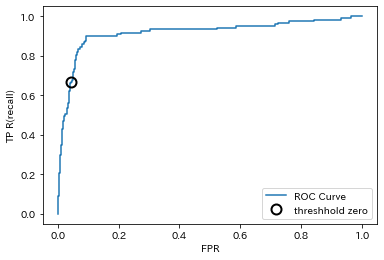

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TP R(recall)')
# 0に最も近いスレッショルドを見つける
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='threshhold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

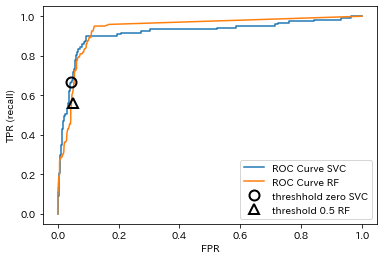

In [34]:
# ランダムフォレストとSVMをROCカーブで比較
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf= roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC Curve SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC Curve RF')

plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshhold zero SVC', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
        label='threshold 0.5 RF', fillstyle='none', c='k', mew=2)

plt.legend(loc=4)

In [35]:
# ROCのカーブの下の領域(AUC)を計算
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('AUC for Random Forest: {:.3f}'.format(rf_auc))
print('AUC for SVC: {:.3f}'.format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC= 0.50
gamma = 0.05 accuracy = 0.90 AUC= 1.00
gamma = 0.01 accuracy = 0.90 AUC= 1.00


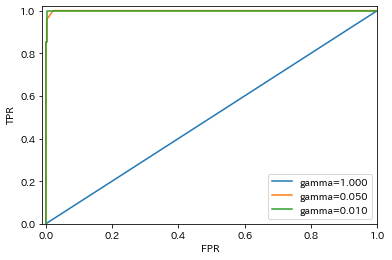

In [38]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma = gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f} accuracy = {:.2f} AUC= {:.2f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

### 5.3.3 多クラス分類の基準

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


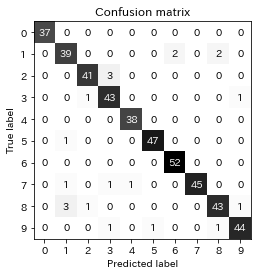

In [46]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label',
                                    ylabel='True label', xticklabels=digits.target_names,
                                    yticklabels = digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title('Confusion matrix')
plt.gca().invert_yaxis()

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [49]:
print('Micro average f1 score: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('Macro average f1 score: {:.3f}'.format(f1_score(y_test, pred, average='macro')))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


## 5.3.5 評価基準を用いたモデル選択

In [55]:
# デフォルトのクラス分類スコアは精度
from sklearn.model_selection import cross_val_score
print('Default scoring: {}'.format(cross_val_score(SVC(), digits.data, digits.target == 9)))
# scoring='accuracy'としても結果は変わらない
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy')
print('Explicit accuracy scoring: {}'.format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc')
print('AUC scoring: {}'.format(roc_auc))

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:19

Default scoring: [0.89983306 0.89983306 0.89983306]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Explicit accuracy scoring: [0.89983306 0.89983306 0.89983306]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC scoring: [0.99372294 0.98957947 0.99594929]


C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target ==9 , random_state=0)

# 説明の都合上、あまり良くないグリッドを与える
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# デフォルトのスコア法である精度で評価
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print('Grid-Search with accuracy')
print('Best parameters:', grid.best_params_)
print('Best cross-validation score (accuracy)): {:.3f}'.format(grid.best_score_))
print('Test set AUV : {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('Test set accuracy: {:.3f}'.format(grid.score(X_test, y_test)))

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUV : 0.992
Test set accuracy: 0.973


In [62]:
# AUCをスコアに用いる
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)
print('\nGrid-Search with AUC')
print('Best parameters:', grid.best_params_)
print('Best cross-validation socre (AUC): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(grid.score(X_test, y_test)))

C:\Users\mikam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation socre (AUC): 0.997
Test set AUC: 1.000


In [64]:
from sklearn.metrics.scorer import SCORERS
print('Available scorers:\n{}'.format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
